<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/026%20-%20Lesson%2026%20(Meteorite%20Landings%20-%20Count%20Plots).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 26: Meteorite Landings - Count Plots

### Teacher-Student Activities

In the previous classes, we learnt how to create a cartogram. In this class, we will learn how to create a count plot.

A count plot is simply a type of bar graph which presents the number of occurrences of a value in a visual format. It helps in visualising the variation of values for a particular feature. For e.g., if you want to see graphically whether the number of meteorites falling over the years increasing or decreasing year-on-year basis, then you can chose to create a count plot. They are very easy to create. Let's get create a few count plots to get a better understanding.

Let's quickly rush through the activities we covered in the previous class and begin this class from **Activity 1: Count Plots** section.



---

#### Recap

Dataset Link (don't click on it):

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv


In [ ]:
# Below are the activities that have been covered in the previous class.
# 1. Import the necessary libraries for this class and create a DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame.
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


---

#### Activity 1: Count Plots^

Now let's make a count plot for all the years after 1990 to see the variation in the number of meteorites observed over the years. For this, we need to create a DataFrame for all the meteorites observed (`Fell` & `Found`) after 1990.

In [ ]:
# Student Action: Create a DataFrame called 'met_after_1990_df' and store data for the meteorites discovered after 1990.
met_after_1990_df = correct_lat_long_df[correct_lat_long_df['year']> 1990]

So there are 16,503 meteorites which were observed (`Fell & Found`) after 1990. Now, let's create a count plot for this DataFrame.

To create a count plot, we will use the `countplot()` function which exists in the `seaborn` module. It takes two inputs. The first input is the axis on which the values to be plotted and the second input is the source of the data, i.e., the DataFrame containing those values. Here, we will plot the `year` values on the x-axis.

In [ ]:
met_after_1990_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001,13.66033,28.96000,"(13.660330, 28.960000)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002,45.82133,6.01533,"(45.821330, 6.015330)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008,20.74575,32.41275,"(20.745750, 32.412750)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009,31.80500,-97.01000,"(31.805000, -97.010000)"
70,Ban Rong Du,4934,Valid,"Iron, ungrouped",16700.0,Fell,1993,16.66667,101.18333,"(16.666670, 101.183330)"


In [ ]:
met_after_1990_df.shape

(16503, 10)

In [ ]:
met_after_1990_df['year'].value_counts()

2003    1714
1999    1582
1997    1510
2000    1506
2001    1286
2006    1223
2002    1031
1993     979
1991     871
1994     719
1996     583
1995     486
1998     485
2010     420
2011     391
1992     372
2009     323
2004     264
2008     261
2005     245
2007     236
2012      15
2013       1
Name: year, dtype: int64

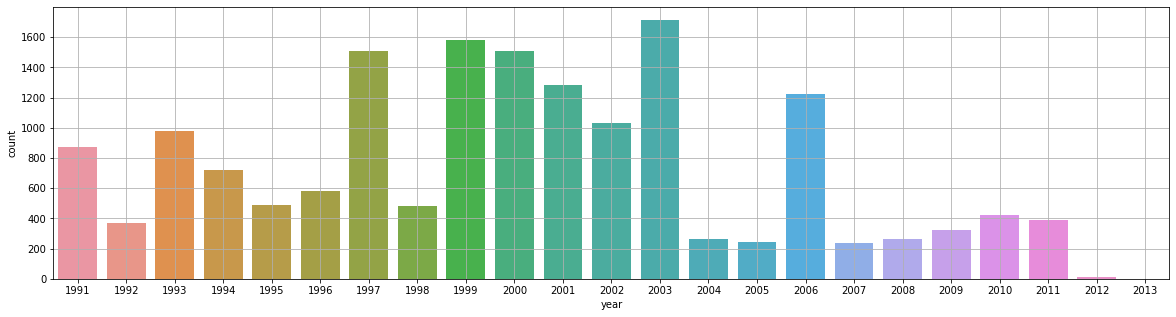

In [ ]:
# Teacher Action: Create a count plot for the 'year' values in the 'met_after_1990_df' DataFrame on the x-axis.
import seaborn as sns
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_after_1990_df)
plt.grid()
plt.show()

So according to the above count plot, after the years 1990 (exclusive), the number of meteorites falling have been increasing and decreasing non-periodically. In other words, there appears no fixed pattern in the number of the falls of meteorites.

Most number of meteorites were observed in the year 2003. Thereafter, the number of meteorites observed dropped.


---

#### Activity 2: Horizontal Bars In Count Plot^^

We can also change the orientation of a count plot by plotting it horizontally. In other words, we can plot the year values on the y-axis by replacing `x` with `y` in the `countplot()` function.

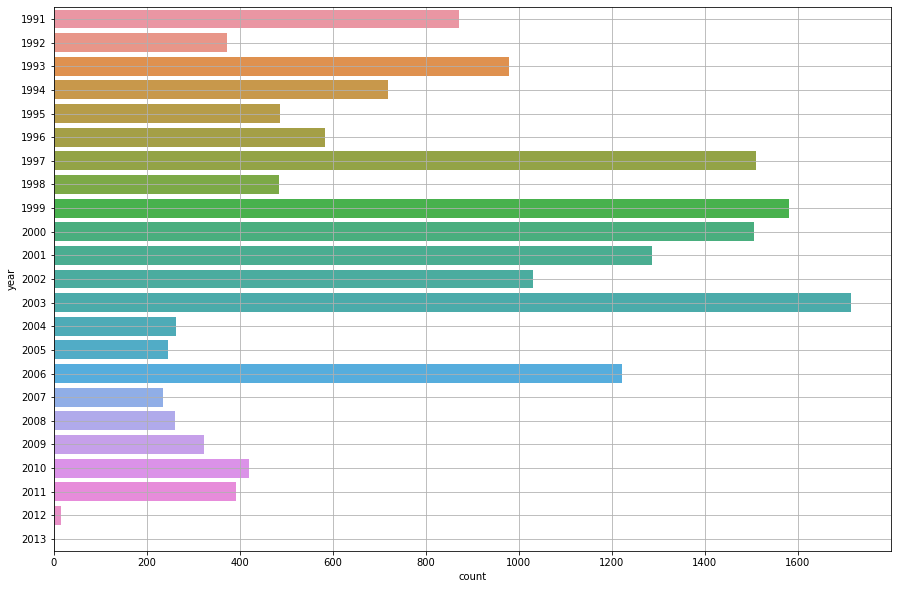

In [ ]:
# Teacher Action: Create a count plot for the 'year' values in the 'met_after_1990_df' DataFrame on the y-axis.
plt.figure(figsize = (15,10))
sns.countplot(y = 'year', data = met_after_1990_df)
plt.grid()
plt.show()

As you can see, we have printed the `year` count values on the y-axis. It is entirely up to you to choose the axis.

---

#### Activity 3: The `hue` Parameter^^^

We can split the count bars based on a category in a count plot. For e.g.,
we can split the count bars to show

- the number of meteorites that fell but were not found in a year and

- the number of meteorites that fell and were found in a year

To split the count bars based on a category, use the `hue` parameter.

In [ ]:
met_after_1990_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001,13.66033,28.96000,"(13.660330, 28.960000)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002,45.82133,6.01533,"(45.821330, 6.015330)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008,20.74575,32.41275,"(20.745750, 32.412750)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009,31.80500,-97.01000,"(31.805000, -97.010000)"
70,Ban Rong Du,4934,Valid,"Iron, ungrouped",16700.0,Fell,1993,16.66667,101.18333,"(16.666670, 101.183330)"


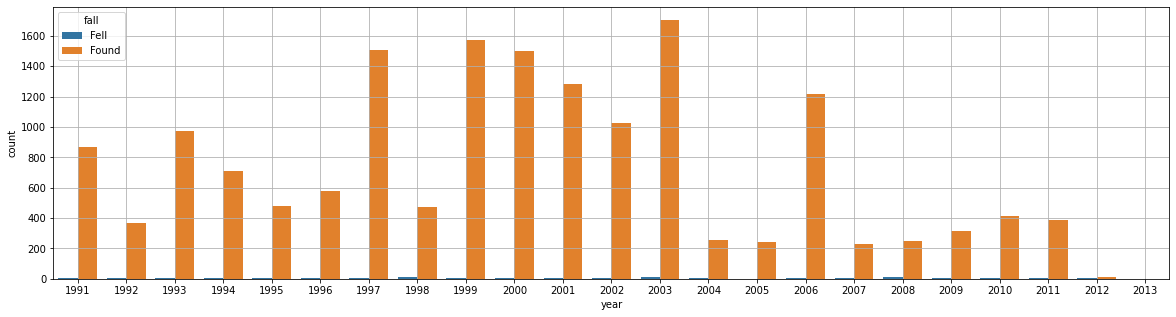

In [ ]:
# Student Action: Split the count bar for each meteorite counts for a year into the 'Fell' bar and the 'Found' bar.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_after_1990_df, hue = 'fall')
plt.grid()
plt.show()

As you can see, we have divided the count bars into the count of `Fell` and the count of `Found` bars for a year. The blue coloured bars represent the count of the meteorites which fell but not found in a year whereas the orange coloured bars represent the count of the meteorites which fell but were found in a year. The `Fell` values are very low in comparison to the `Found` values. Hence, the blue coloured bars are very short compared to the orange coloured bars.

Similarly, we can also divide the count bars based on the `nametype` category.

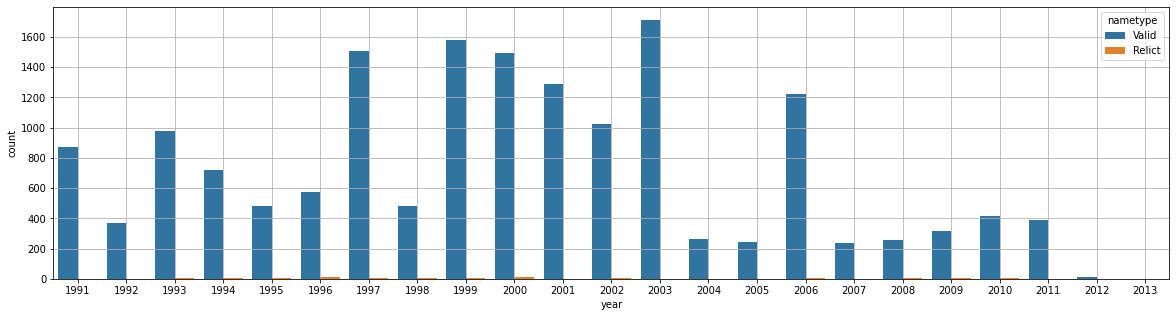

In [ ]:
# Student Action: Split the count bar for each meteorite counts for a year into the 'Valid' bar and the 'Relict' bar.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_after_1990_df, hue = 'nametype')
plt.grid()
plt.show()

As you can see, we have divided the count bars into the count of `Valid` and the count of `Relict` bars for a year. The blue coloured bars represent the count of the meteorites that were found in a good condition in a year whereas the orange coloured bars represent the count of the meteorites that were found in a withered condition in a year. The `Relict` values are very low in comparison to the `Valid` values. Hence, the orange coloured bars are very short compared to the blue coloured bars.

Now, let's create a count plot for the meteorites observed between the years 1961 and 1990 (both inclusive).

In [ ]:
# Student Action: Create a DataFrame for the years between 1961 and 1990.
met_1961_1990_df = correct_lat_long_df[(correct_lat_long_df['year'] >= 1961) & (correct_lat_long_df['year'] <= 1990)]

So, there are 13,631 meteorites which were observed between 1961 and 1990 (both inclusive). Let's create a count plot for these years.

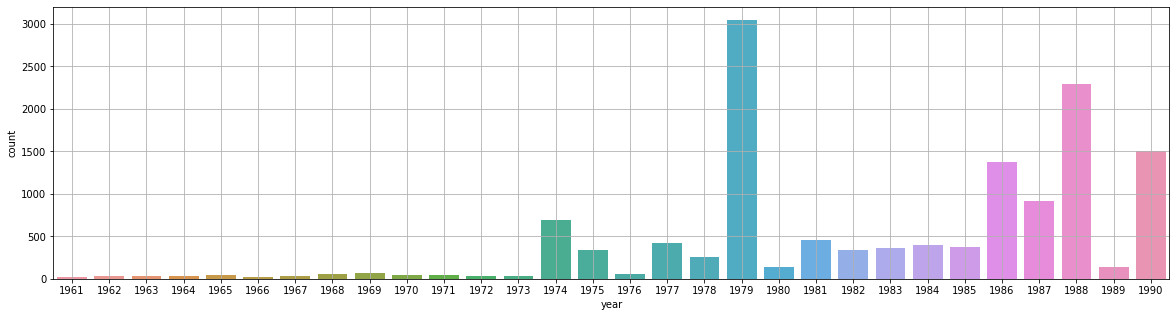

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_1961_1990_df)
plt.grid()
plt.show()

As you can see, the number of meteorites fallen on Earth started increasing since 1974. Before 1974, the number of meteorites fallen were consistently less than 500. This could also possibly mean that till 1974, we did not had the capacity (or technology) to precisely monitor the fall of the meteorites.

The most number of meteorites were observed in the year 1979. Now, let's split the count bar for each year into two count bars based on the `fall` category.



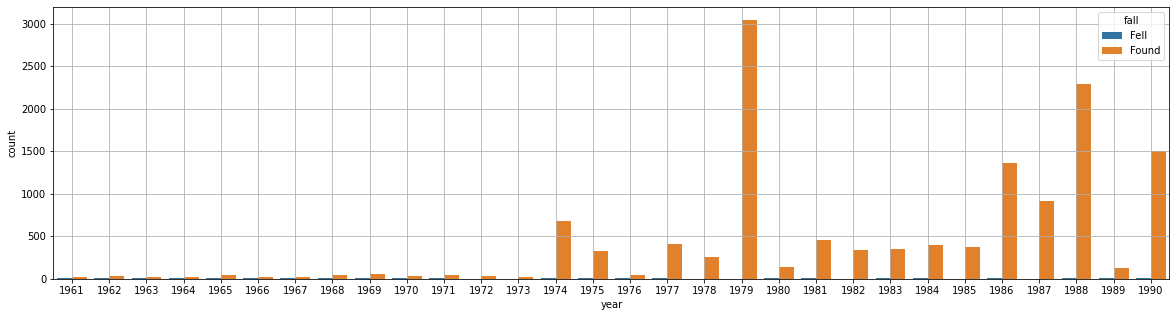

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame with 'fall' as the hue parameter.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_1961_1990_df, hue = 'fall')
plt.grid()
plt.show()

Again, the `Found` meteorites are large in numbers for each year.

Now, let's split the count bars into two count bars based on the `nametype` category.


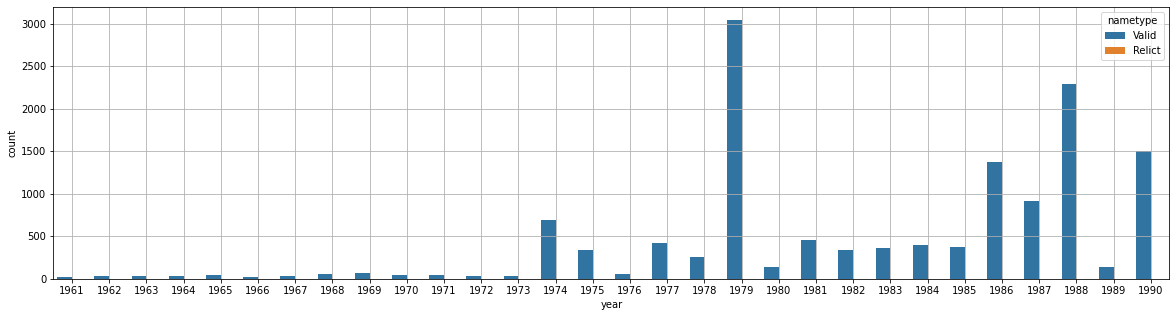

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1961_1990_df' DataFrame with 'nametype' as the hue parameter.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_1961_1990_df, hue = 'nametype')
plt.grid()
plt.show()

Again, the `Valid` meteorites are large in numbers for each year.

Let's create another count plot for the meteorites observed between the years 1921 and 1960 (both inclusive).

In [ ]:
# Student Action: Create a DataFrame for the years between 1921 to 1960 (both inclusive).
met_1921_1960_df = correct_lat_long_df[(correct_lat_long_df['year'] >= 1921) & (correct_lat_long_df['year'] <= 1960)]

So, there are 876 meteorites which are observed during the years 1921 and 1960. Let's create a count plot for this period.

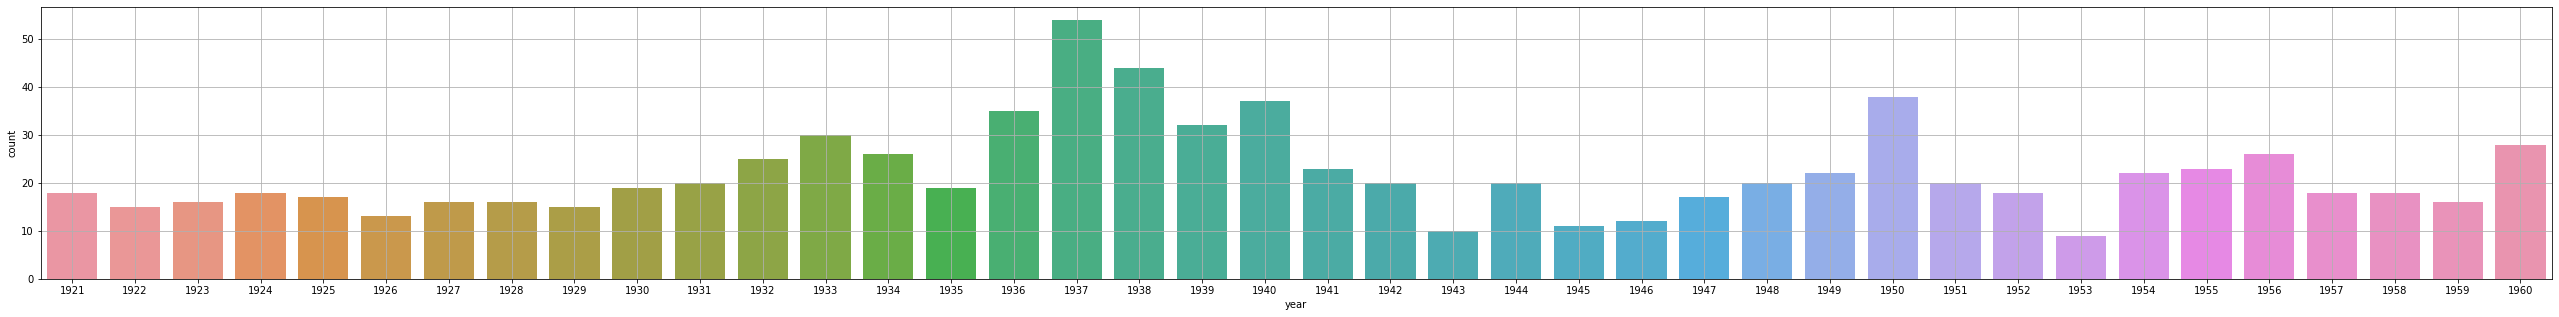

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame.
plt.figure(figsize = (45,5))
sns.countplot(x = 'year', data = met_1921_1960_df)
plt.grid()
plt.show()

In [ ]:
met_1921_1960_df.shape[0]

876

Again, there is no fixed pattern in the number of fallen meteorites between 1921 and 1960.

In the period 1921 to 1960, most numbers of meteorites were observed in the year 1937 but they all are less than 100 which is not so significant compared to the meteorites observed in late 1900s and 2000s.

Now, let's split the count bars into two count bars based on the `fall` category.


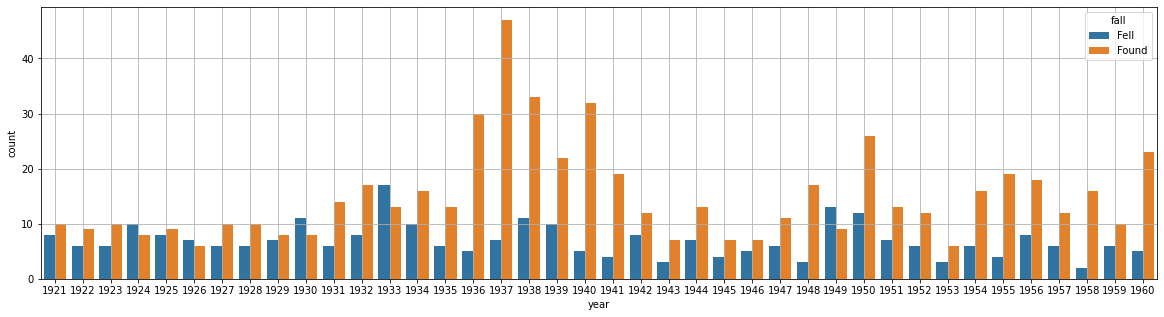

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame with 'fall' as the hue parameter.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_1921_1960_df, hue = 'fall')
plt.grid()
plt.show()

Between 1921 and 1960, the difference between the number of `Fell` meteorites and `Found` meteorites for every year is not huge unlike between 1961 and 1990.

Now, let's split the count bars into two count bars based on the `nametype` category.


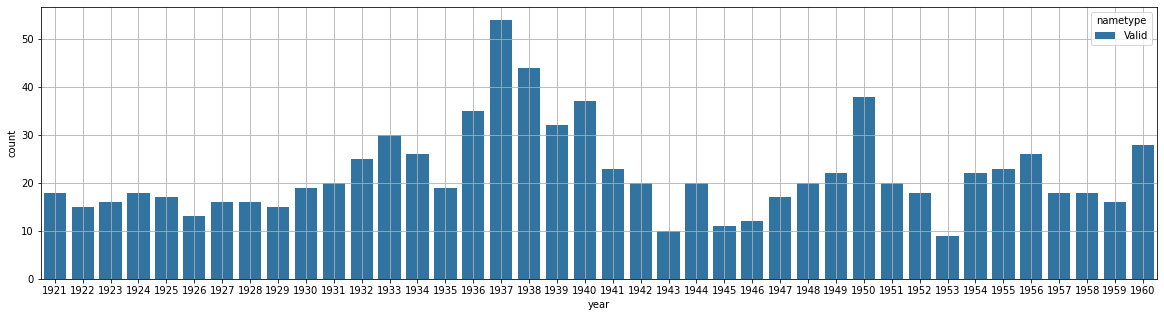

In [ ]:
# Student Action: Create a count plot for the 'year' column in the 'met_1921_1960_df' DataFrame with 'nametype' as the hue parameter.
plt.figure(figsize = (20,5))
sns.countplot(x = 'year', data = met_1921_1960_df, hue = 'nametype')
plt.grid()
plt.show()

So, there were no withered meteorites between 1921 to 1960. This could also mean that we did not had the capacity (or technology) to find the withered meteorites between 1921 and 1960.

Additionally, it seems that as we go in the past, the number of meteorites observed decrease.

Let's create a DataFrame for the meteorites observed in all the years on or before 1920 and then use the `value_counts()` function to count the number of meteorites observed.

In [ ]:
# Student Action: Create a DataFrame for the meteorites observed before 1921.
met_before_1921 = correct_lat_long_df[correct_lat_long_df['year'] < 1921]

So, a total of 1026 meteorites were observed between the years 860 and 1920 (both inclusive). That's even less than 1 meteorite observed per year on an average because

$$\frac{\text{Number of meteorites observed}}{\text{Number of years}} = \left(\frac{1026}{1920 - 860 + 1} \right) = \frac{1026}{1060 + 1}$$

$$\Rightarrow \frac{1026}{1061} < 1$$

There are
$1061$
years between 860 and 1920 including both of them.

**Note:** To count the number of natural numbers between two natural numbers
$a$ and $b$ where $a < b$ including both of them, use the $(b - a + 1)$
mathematical expression.

Let's create a count plot for the meteorites observed before 1921.

In [ ]:
met_before_1921.shape[0]

1026

In [ ]:
1921-860

1061

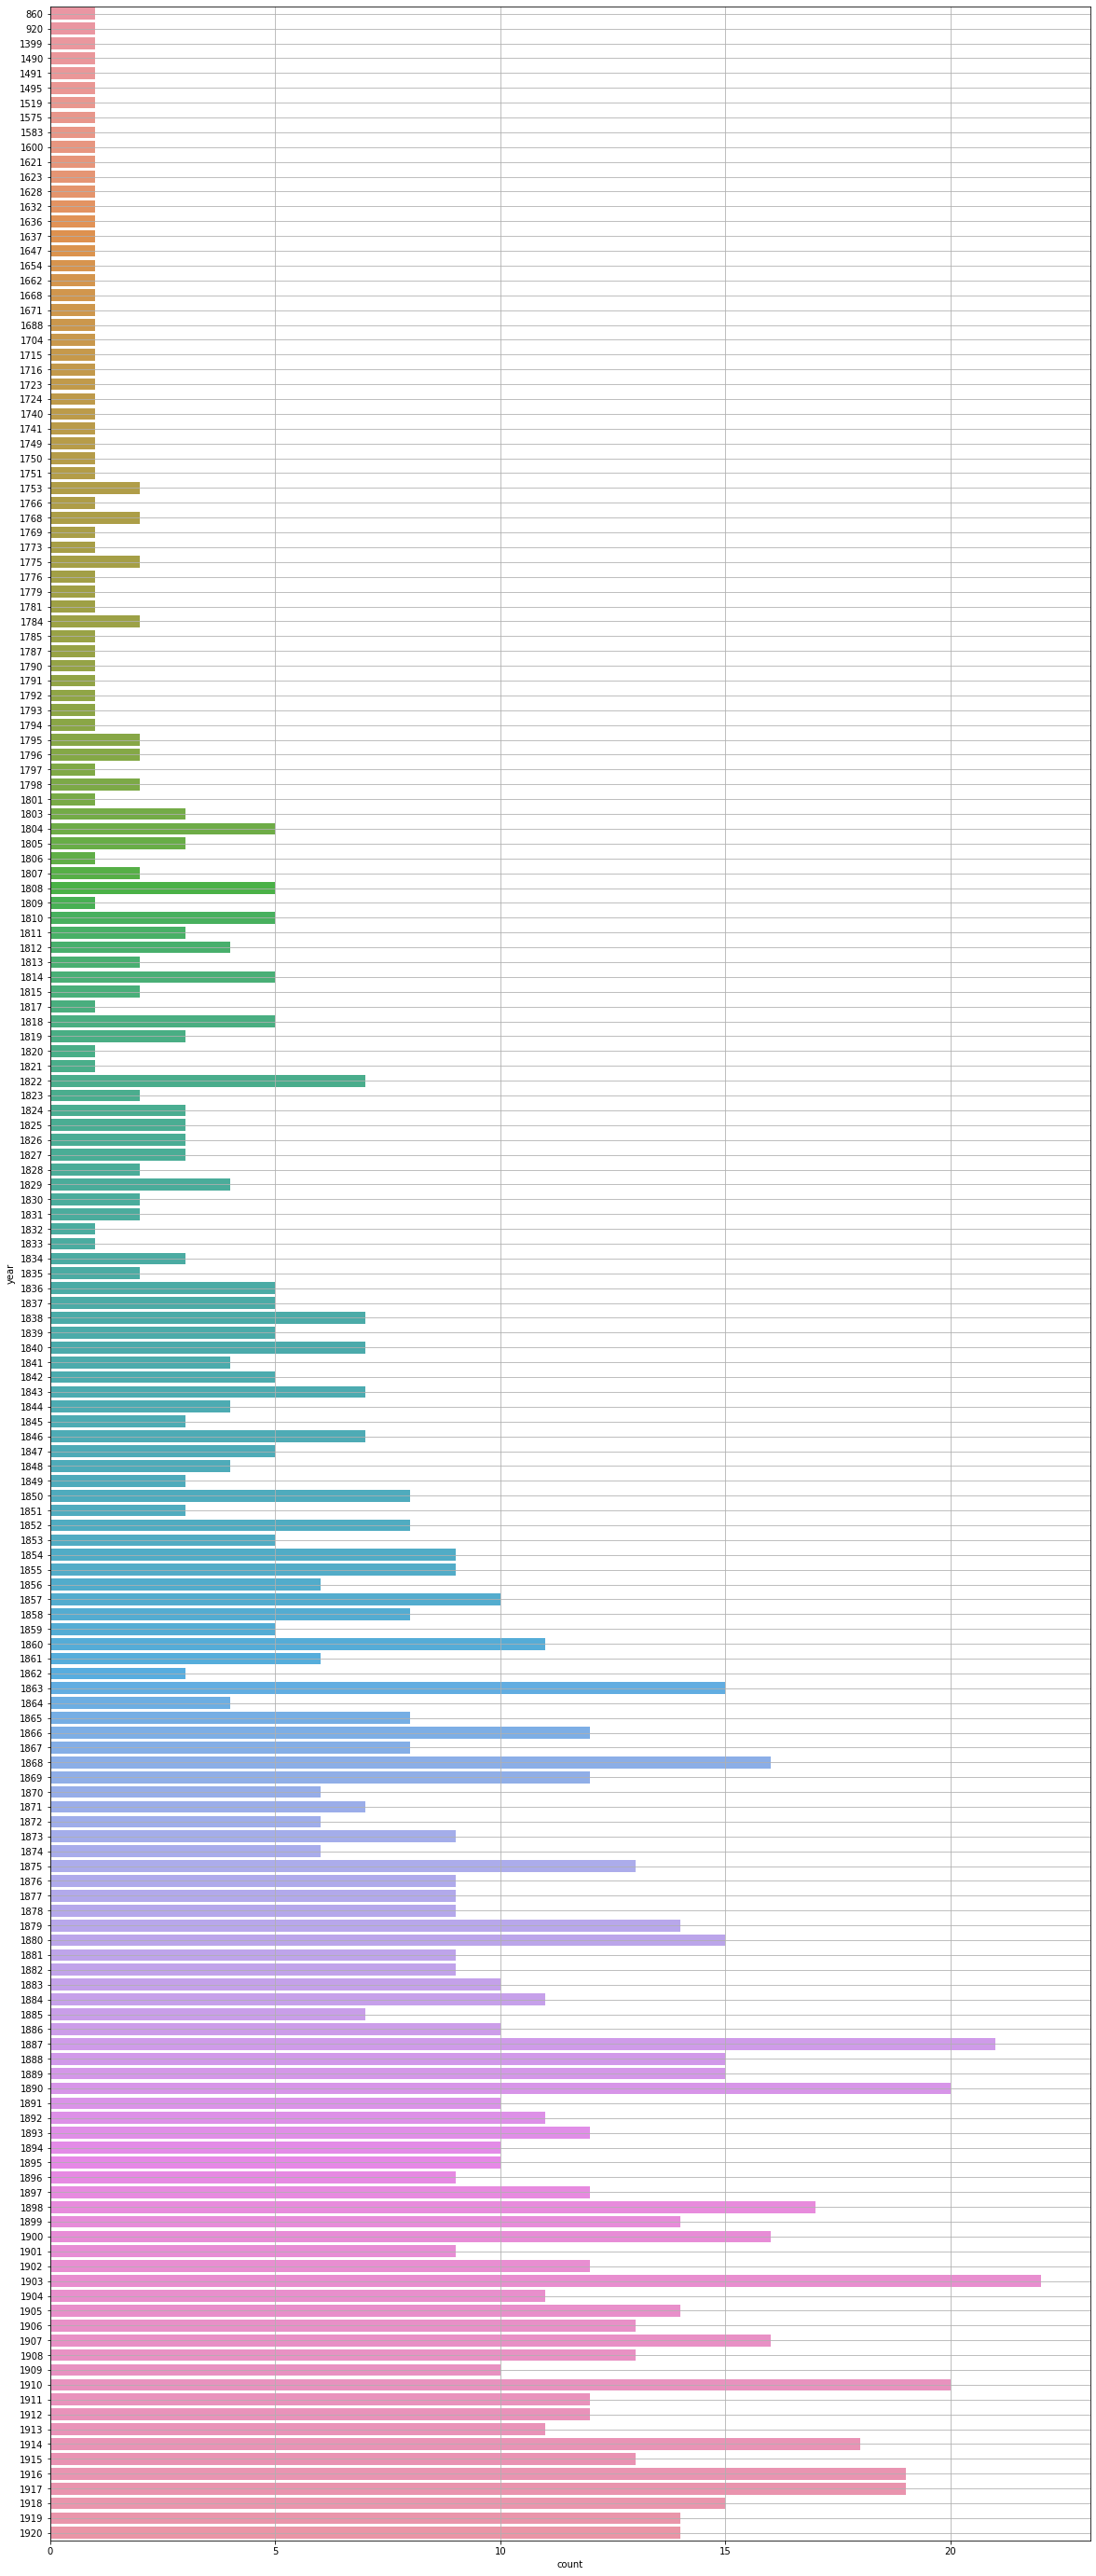

In [ ]:
# Student Action: Create a count plot for the meteorites observed before 1921.
plt.figure(figsize = (20,50))
sns.countplot(y = 'year', data = met_before_1921)
plt.grid()
plt.show()

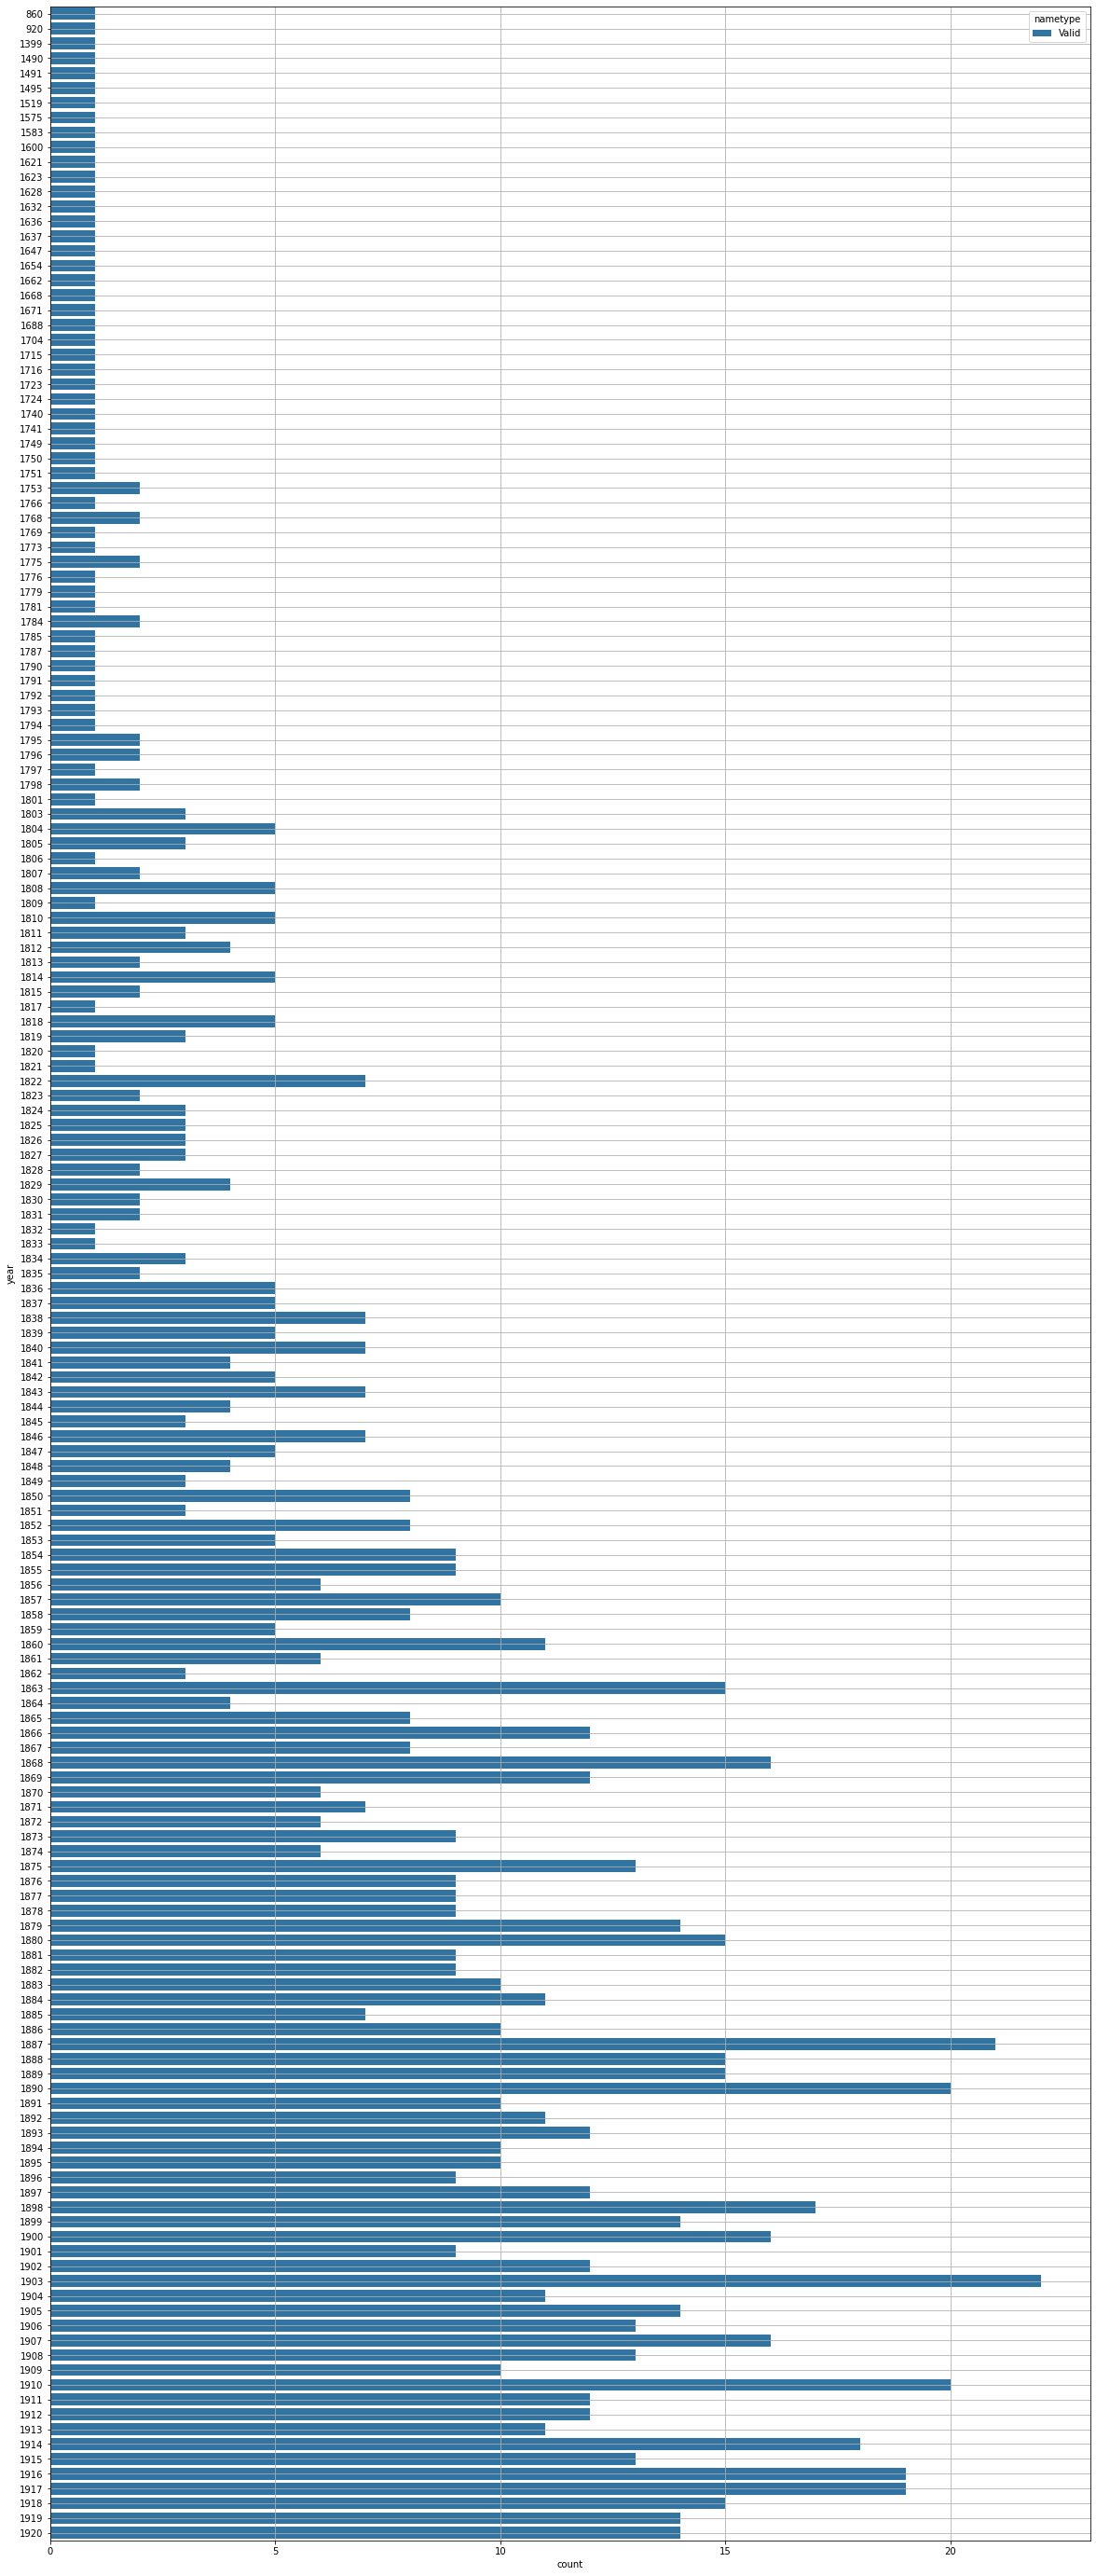

In [ ]:
plt.figure(figsize = (20,50))
sns.countplot(y = 'year', data = met_before_1921, hue = 'nametype')
plt.grid()
plt.show()

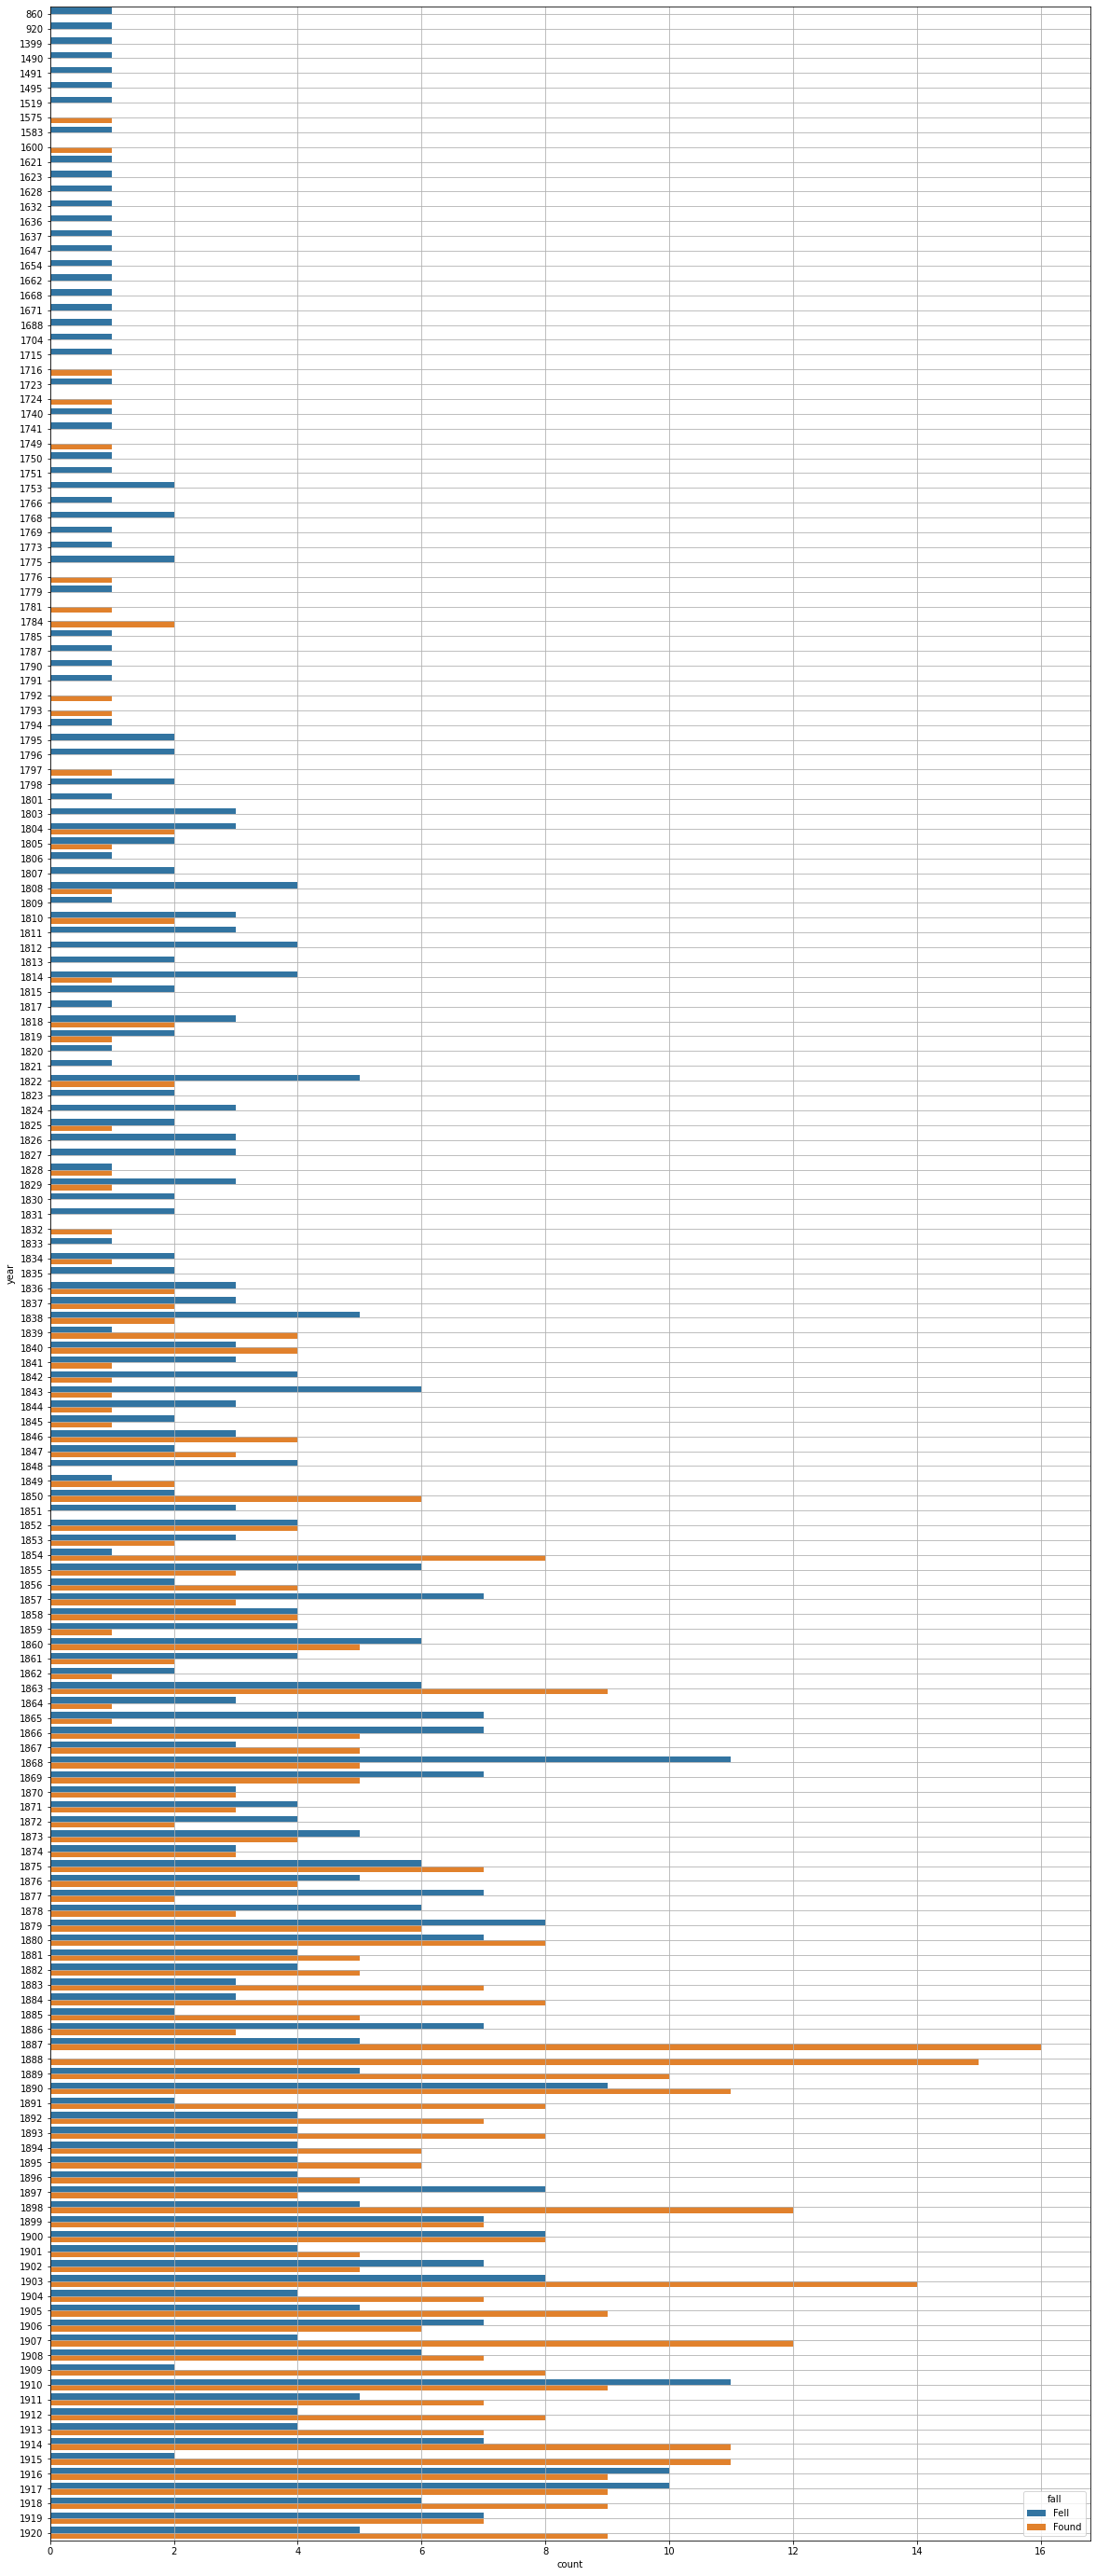

In [ ]:
plt.figure(figsize = (20,50))
sns.countplot(y = 'year', data = met_before_1921, hue = 'fall')
plt.grid()
plt.show()

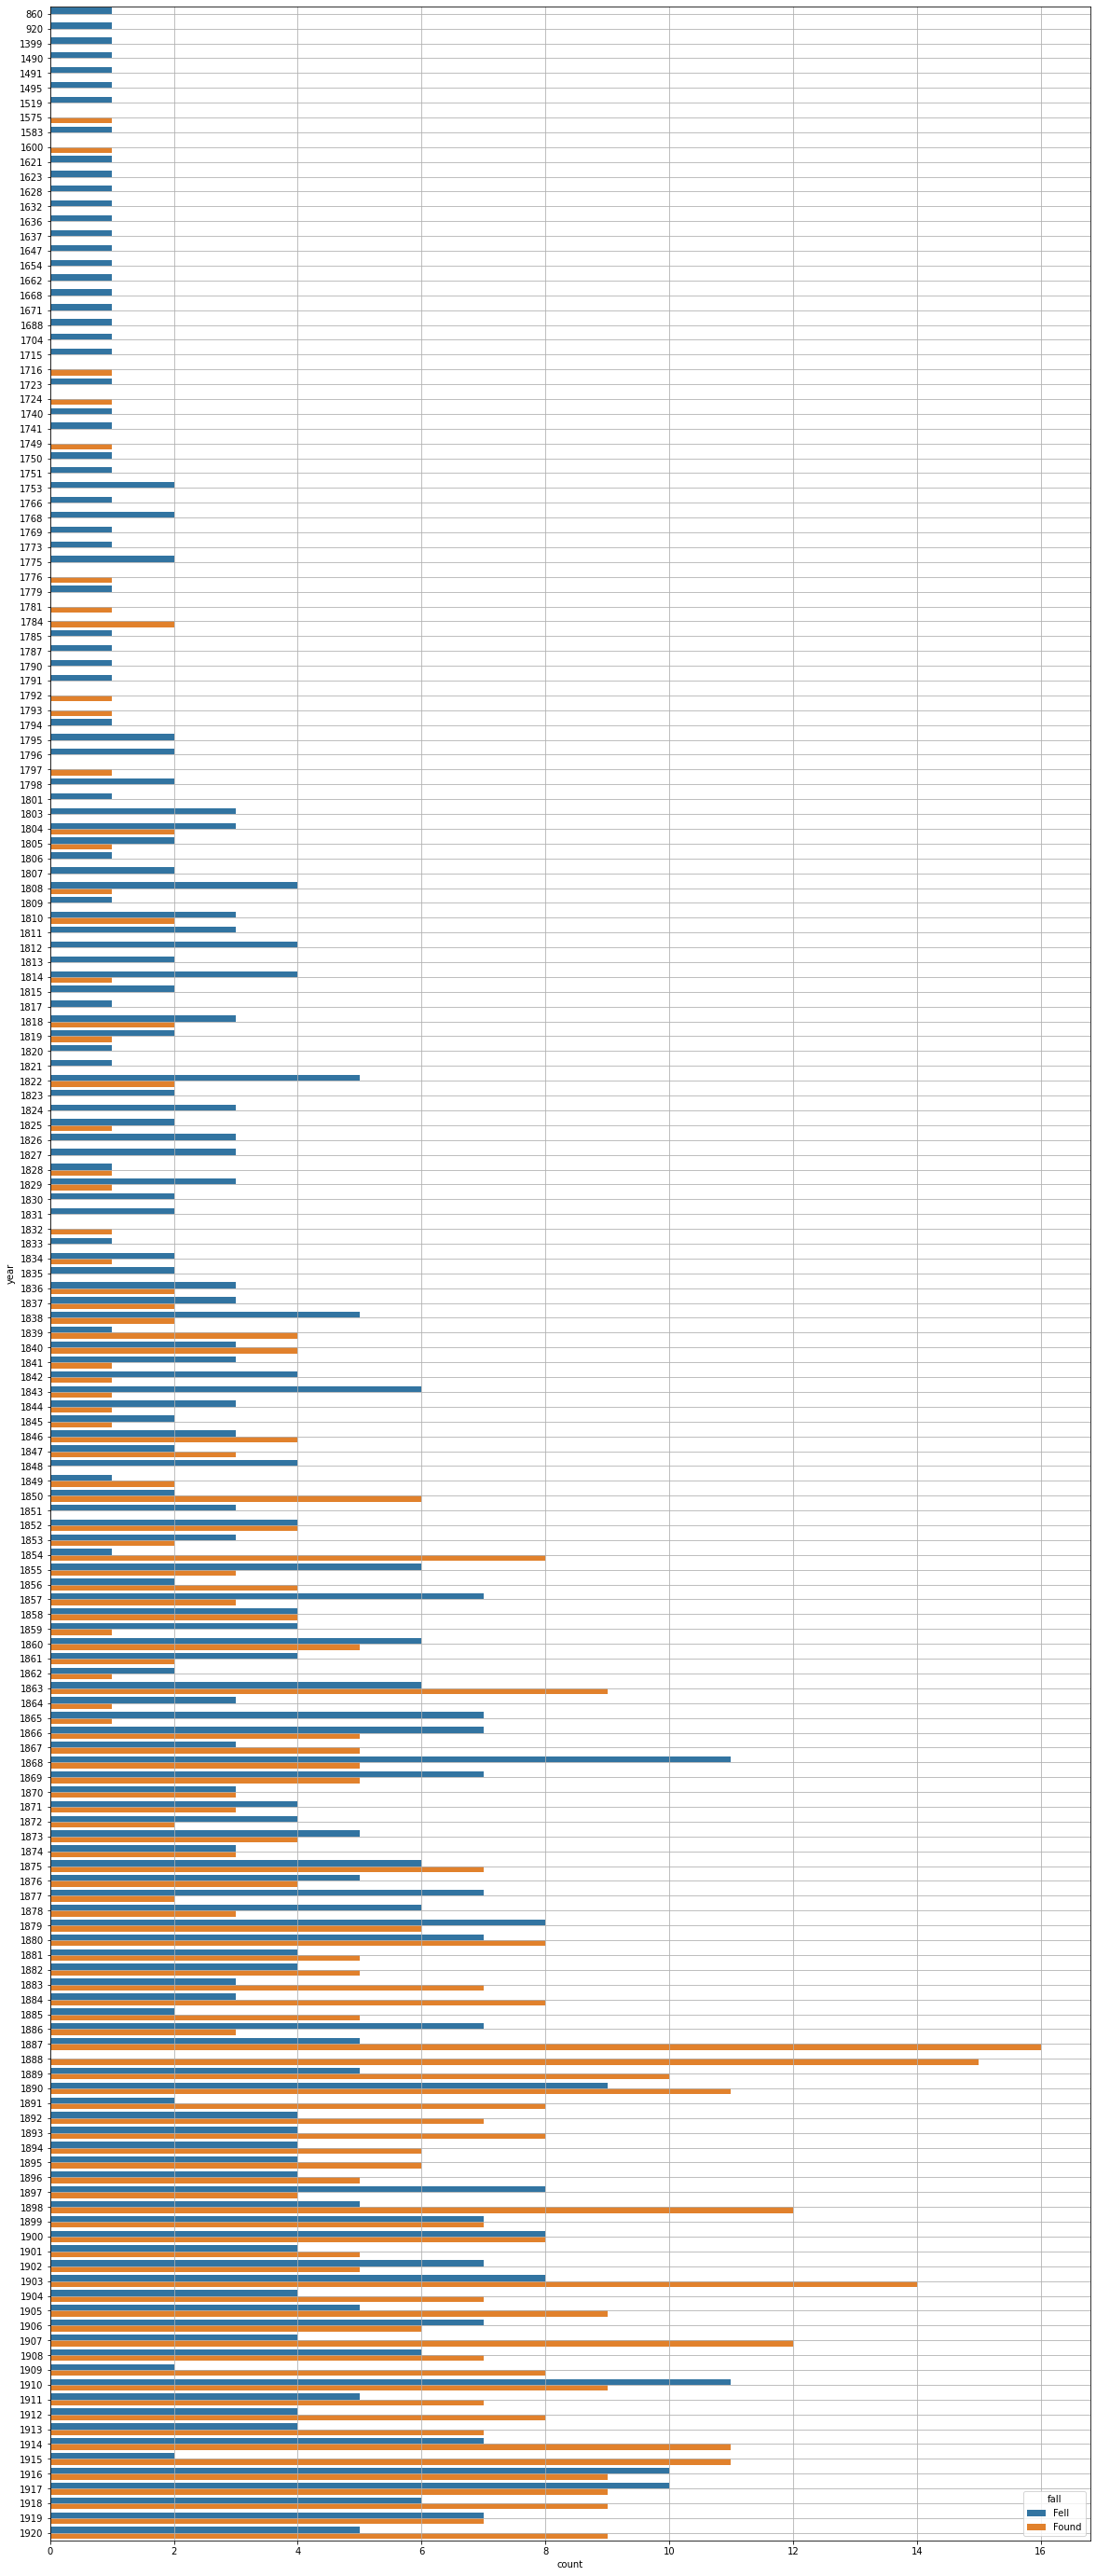

In [ ]:
plt.figure(figsize = (20,50))
sns.countplot(y = 'year', data = met_before_1921, hue = 'fall')
plt.grid()
plt.show()

As we can see, the number of meteorites observed before 1921 drops significantly even less than 5.

So, the count plots helps us in visualising the data and exploring the trend (if there exists one). Also, creating a count plot is a very straight forward task. In the next class, we will learn how to create histograms.

---